# MNIST with CNN

In [166]:
import os
import urllib

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

### Helper Functions

Function to help intialize random weights for fully connected or convolutional layers, we leave the shape attribute as a parameter for this.

In [167]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

Same as init_weights, but for the biases

In [168]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Create a 2D convolution using builtin conv2d from TF. From those docs:

Computes a 2-D convolution given 4-D `input` and `filter` tensors.

Given an input tensor of shape `[batch, in_height, in_width, in_channels]`
and a filter / kernel tensor of shape
`[filter_height, filter_width, in_channels, out_channels]`, this op
performs the following:

1. Flattens the filter to a 2-D matrix with shape
   `[filter_height * filter_width * in_channels, output_channels]`.
2. Extracts image patches from the input tensor to form a *virtual*
   tensor of shape `[batch, out_height, out_width,
   filter_height * filter_width * in_channels]`.
3. For each patch, right-multiplies the filter matrix and the image patch
   vector.


In [169]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

Create a max pooling layer, again using built in TF functions:

Performs the max pooling on the input.

    Args:
      value: A 4-D `Tensor` with shape `[batch, height, width, channels]` and
        type `tf.float32`.
      ksize: A list of ints that has length >= 4.  The size of the window for
        each dimension of the input tensor.
      strides: A list of ints that has length >= 4.  The stride of the sliding
        window for each dimension of the input tensor.
      padding: A string, either `'VALID'` or `'SAME'`. 

In [170]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

Using the conv2d function, we'll return an actual convolutional layer here that uses an ReLu activation.

In [171]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

This is a normal fully connected layer

In [172]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

# Helper (custom functions)

In [173]:
def one_hot_encode(pos):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    out = np.zeros(10)
    out[pos] = 1
    return out

In [174]:
#duck smile car pencil star burger cookie rabbit moon icecream
fileList = ['duck','smile','car','pencil','star','burger','cookie','rabbit','moon','icecream']
for i in range(len(fileList)):
    print('{} lenght {}'.format(fileList[i], len(np.load('./SKETCH_data/'+fileList[i]+'.npy'))))


duck lenght 135480
smile lenght 124386
car lenght 182764
pencil lenght 122001
star lenght 137619
burger lenght 129672
cookie lenght 131353
rabbit lenght 155288
moon lenght 121661
icecream lenght 123133


In [175]:
# images = []
# pos_begin = 0
# pos_end = 100
# fileList = ['duck','smile','car','pencil','star','burger','cookie','rabbit','moon','icecream']
# images = np.array(np.load('./SKETCH_data/'+ fileList[0] +'.npy')[pos_begin:pos_end])
            

In [176]:
# np.concatenate((images,np.array(np.load('./SKETCH_data/'+ fileList[1] +'.npy')[pos_begin:pos_end])), axis=0)

In [177]:
def display(img, predict, label):
    plt.title('Predict %s. Label: %d' % (predict, label))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)
    plt.show()
# display(test_x[0], 0, 0)

In [178]:
class SketchImageHelper():
    
    def __init__(self):
        print("Init SketchImageHelper")
        self.position = 0
        
        self.batch_x = None
        self.batch_y = None
        
        self.pos_begin = 1000
        self.pos_end = 110000
        
        self.images = []
        self.labels = []
        
        self.fileList = ['duck','smile','car','pencil','star','burger','cookie','rabbit','moon','icecream']
    
    def set_up_images(self):
        
        print("Setting Up Batch Images and Labels")
        sampleSize = self.pos_end - self.pos_begin
        i = 0
        for i in range(len(self.fileList)):
            partialImages = np.array(np.load('./SKETCH_data/'+ self.fileList[i] +'.npy')[self.pos_begin:self.pos_end])
            self.images.append( partialImages / 255)
            self.labels.append(np.full((sampleSize,10), one_hot_encode(i)))

        print('batch lenght {}'.format(len(self.images)))
        print('batch lenght {}'.format(len(self.labels)))
        
        
    def next_batch(self, batch_size):                          
        x = []
        y = []
        partial_batch = batch_size // len(self.fileList)
        i = 0
        for i in range(len(self.fileList)):
            if i==0:
                x = np.array((self.images[i])[self.position:self.position+partial_batch])
                y = np.array((self.labels[i])[self.position:self.position+partial_batch])
            else:
                x = np.concatenate((x,np.array((self.images[i])[self.position:self.position+partial_batch])), axis=0)
                y = np.concatenate((y,np.array((self.labels[i])[self.position:self.position+partial_batch])), axis=0)  

        
        self.position = (self.position + partial_batch)
        print(' {}'.format(self.position), end='')
        return x, y

In [179]:
# sih = SketchImageHelper()
# sih.set_up_images()
# lotx, loty = sih.next_batch(500)

In [180]:
# print(len(sih.images[0]))
# display(sih.images[0][51], 0, 0)

In [181]:
# len(lotx)
# display(lotx[4], 0, 0)

In [182]:
# lotx, loty = sih.next_batch(500)

In [183]:
# len(lotx)
# display(lotx[4], 0, 0)

In [184]:
# lotx, loty = sih.next_batch(500)

### Placeholders

In [185]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [186]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

### Layers

In [187]:
x_image = tf.reshape(x,[-1,28,28,1])

In [188]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [189]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [190]:
# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous Convolution
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [191]:
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [192]:
y_pred = normal_full_layer(full_one_dropout,10)

### Loss Function

In [193]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

### Optimizer

In [194]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001) # 0.0001
train = optimizer.minimize(cross_entropy)

### Intialize Variables

In [195]:
init = tf.global_variables_initializer()

### Session

In [196]:
#duck smile car pencil star burger cookie rabbit moon icecream

pos_begin = 0
pos_end = 500

test_x = np.concatenate((np.array(np.load('./SKETCH_data/duck.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/smile.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/car.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/pencil.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/star.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/burger.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/cookie.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/rabbit.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/moon.npy')[pos_begin:pos_end]),np.array(np.load('./SKETCH_data/icecream.npy')[pos_begin:pos_end])), axis=0)
test_y = np.concatenate((np.full((pos_end-pos_begin,10), one_hot_encode(0)), np.full((pos_end-pos_begin,10), one_hot_encode(1)), np.full((pos_end-pos_begin,10), one_hot_encode(2)), np.full((pos_end-pos_begin,10), one_hot_encode(3)),
                               np.full((pos_end-pos_begin,10), one_hot_encode(4)), np.full((pos_end-pos_begin,10), one_hot_encode(5)), np.full((pos_end-pos_begin,10), one_hot_encode(6)), np.full((pos_end-pos_begin,10), one_hot_encode(7)),
                               np.full((pos_end-pos_begin,10), one_hot_encode(8)), np.full((pos_end-pos_begin,10), one_hot_encode(9))), axis=0)

print('test_x lenght {}'.format(len(test_x)))
print('test_y lenght {}'.format(len(test_y)))

test_x lenght 5000
test_y lenght 5000


In [120]:
# sih = SketchImageHelper()
# sih.set_up_images()

# with tf.Session() as sess:
    
#     sess.run(init)
#     batch_x , batch_y = sih.next_batch(500)
    
#     print(batch_x[0])
#     print(batch_y[0])

Init SketchImageHelper
Setting Up Batch Images and Labels
batch lenght 10
batch lenght 10
 50[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.16078431
  0.33333333  0.35294118  0.04705882  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.40784314
  0.98039216  1.          1.          0.91372549  0.36470588  0.          0.
  0.          0.          0.          0.          0.          0.    

In [200]:
sih = SketchImageHelper()
sih.set_up_images()

sess = tf.InteractiveSession()

Init SketchImageHelper
Setting Up Batch Images and Labels
batch lenght 10
batch lenght 10


In [201]:
steps = 100

print('INIT')
sess.run(init)

for j in range(steps):
    # print('.', end='')
    batch_x , batch_y = sih.next_batch(500)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})

    # PRINT OUT A MESSAGE EVERY 100 STEPS
    if j%50 == 0:
        print('\n')
        print('step {}'.format(j))
        print('Accuracy is:')
        # Test the Train Model
        matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

        acc = tf.reduce_mean(tf.cast(matches,tf.float32))

        print(sess.run(acc,feed_dict={x:test_x,y_true:test_y,hold_prob:1.0}))


print('\n')
print('FINAL Accuracy is:')
print(sess.run(acc,feed_dict={x:test_x,y_true:test_y,hold_prob:1.0}))
print('\n')

INIT
 50

step 0
Accuracy is:
0.1156
 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550

step 50
Accuracy is:
0.6166
 2600 2650 2700 2750 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000

FINAL Accuracy is:
0.6946




In [230]:
evalImage = (np.load('./SKETCH_data/duck.npy')[501] / 255)
print(y_pred)

Tensor("add_11:0", shape=(?, 10), dtype=float32)


In [236]:
# make a prediction
# y = tf.nn.softmax(tf.matmul(x,W) + b)
evalImage = (np.load('./SKETCH_data/duck.npy')[501] / 255)

feed_dict = {x: evalImage , y_true: np.zeros((1, 10)) }

classification = sess.run(y_pred, feed_dict)

ValueError: Cannot feed value of shape (784,) for Tensor 'Placeholder_6:0', which has shape '(?, 784)'

In [202]:
display(evalImage, 0, 0)

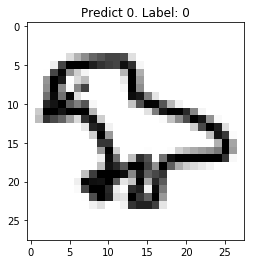

In [203]:
print(classification)

In [ ]:
sess.close()

## Great Job!